In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split as tts
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score as score
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import tensorly as tl
from tensorly.decomposition import tucker

In [9]:
#Aufgabe 1
#Tensoren erstellen von Zahl 1-27, 3,3,3 Grösse
X = np.arange(27).reshape((3,3,3))
X

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [10]:
tl.unfold(X,0) #0.Mode Tensor

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26]])

In [11]:
tl.unfold(X,1)  #1.Mode Tensor

array([[ 0,  1,  2,  9, 10, 11, 18, 19, 20],
       [ 3,  4,  5, 12, 13, 14, 21, 22, 23],
       [ 6,  7,  8, 15, 16, 17, 24, 25, 26]])

In [12]:
tl.unfold(X,2)  #2.Mode Tensor

array([[ 0,  3,  6,  9, 12, 15, 18, 21, 24],
       [ 1,  4,  7, 10, 13, 16, 19, 22, 25],
       [ 2,  5,  8, 11, 14, 17, 20, 23, 26]])

In [15]:
#Aufgabe 2
data = np.loadtxt('data/data.txt', delimiter=',')
data

array([[25.0514,  5.7475,  1.    ],
       [26.6614,  7.3414,  1.    ],
       [25.2653,  6.2466,  1.    ],
       ...,
       [ 5.276 , 17.2475, 31.    ],
       [ 6.4444, 16.2033, 31.    ],
       [ 7.162 , 18.1836, 31.    ]])

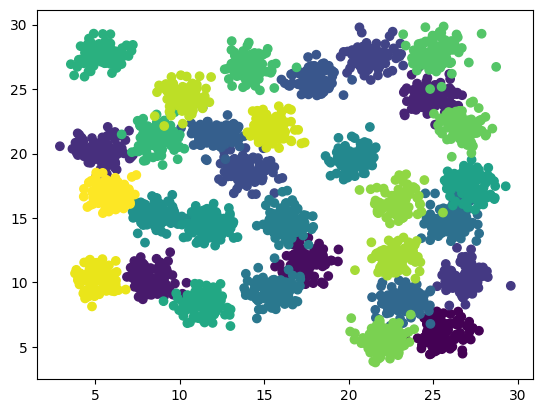

In [16]:
plt.scatter(data[:,0], data[:,1], c=data[:,2])
plt.show()

In [17]:
x_data = data[:,:2]   # Spalten 0 und 1 --> Koordinaten
y_data = data[:,2]    # Spalte 2 --> korrekte Klassifikation

In [18]:
model = KMeans(n_clusters=31) #Anzahl Cluster aus Ellbow-Kriterium
y_pred = model.fit_predict(x_data) #Vorhersage bestimmen

C:\Users\jacqu\OneDrive\Dokumente\MSC DV\Python\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


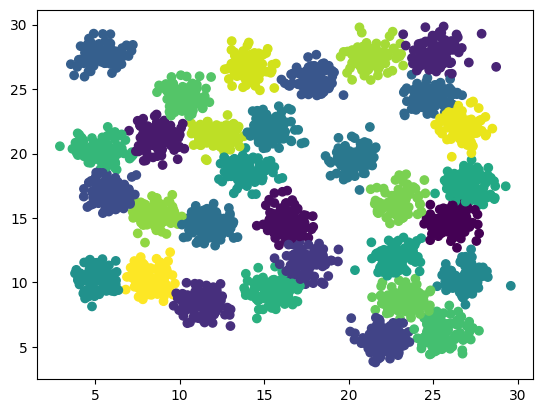

In [19]:
plt.scatter(data[:,0], data[:,1], c=y_pred)
plt.show()

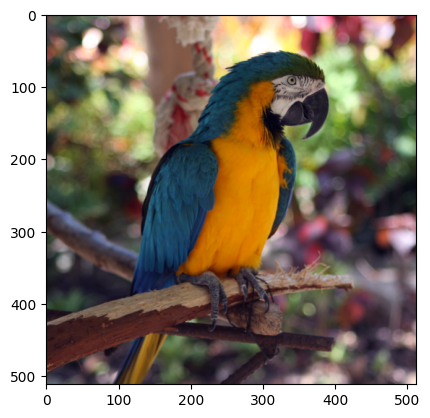

In [76]:
#Aufgabe 3
img = plt.imread('data/papa.png')
plt.imshow(img)
plt.show()

In [78]:
img.data.shape

(512, 512, 3)

In [79]:
data = np.reshape(img, (512*512, 3))

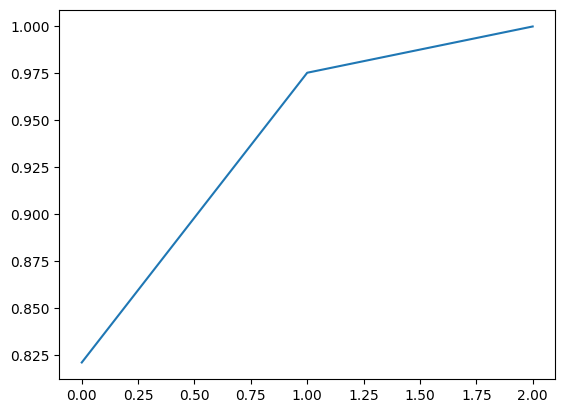

In [85]:
model = PCA()
model.fit(data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.show()

[0.82115092]


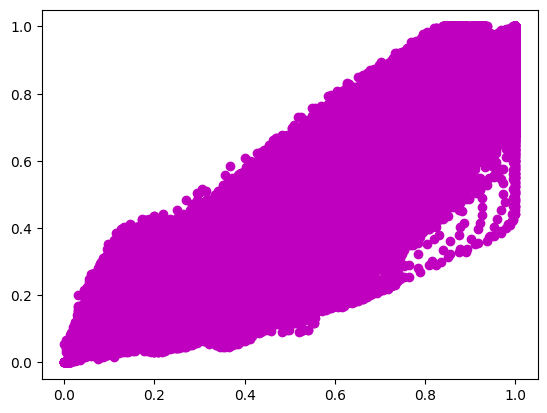

In [86]:
#Varianz ausgeben
model = PCA(0.8)
model.fit(data)
print(model.explained_variance_ratio_) #hier: 82% entlang der ersten Hauptkomponente, 15% entlang der zweiten Hauptkomponente --> 97%
plt.plot(data[:,0], data[:,1], 'mo')
plt.show()

[0.82117372]


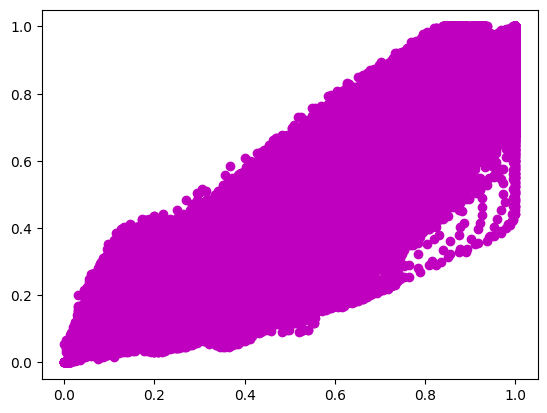

In [83]:
#Varianz ausgeben
model = PCA(n_components=1)
model.fit(data)
print(model.explained_variance_ratio_) #hier: 82% entlang der ersten Hauptkomponente, 15% entlang der zweiten Hauptkomponente --> 97%
plt.plot(data[:,0], data[:,1], 'mo')
plt.show()

In [68]:
model = PCA(n_components=1)
data_proj = model.fit_transform(img)
y = np.zeros([len(data_proj)])
plt.plot(data_proj[:,0], y, 'mo') #y ist 0, nur auf einer Ebene darstellen, hier X-Achse
plt.plot(y, data_proj[:,1], 'co') #y ist 0, nur auf einer Ebene darstellen, hier Y-Achse
plt.show()

ValueError: Found array with dim 3. PCA expected <= 2.

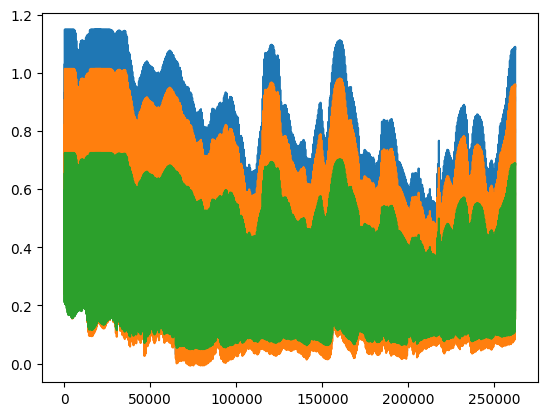

In [53]:
#transponieren
data_recovered = model.inverse_transform(data_proj) #Transpornierte Matrix
plt.plot(data_recovered)
plt.show()

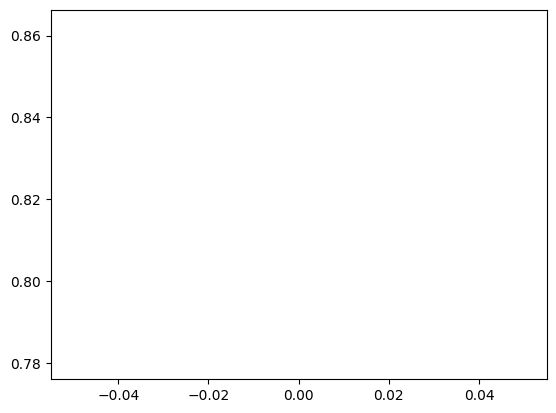

In [54]:
from sklearn.decomposition import PCA
model = PCA(n_components=1)
model.fit(data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.show()

In [55]:
model = PCA(n_components=1) #in 1 Dimensionen
d_proj = model.fit_transform(data.data)
print("var:", model.explained_variance_ratio_) #Differenz zu 1 ist Verlust der Information

var: [0.82115122]


In [59]:
plt.scatter(d_proj[:,0],
c=data.target, alpha=0.5)
cmap=plt.cm.get_cmap('r-', 10)
plt.colorbar()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'target'

In [69]:
data = np.reshape(img, (512*512, 3))

C:\Users\jacqu\OneDrive\Dokumente\MSC DV\Python\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


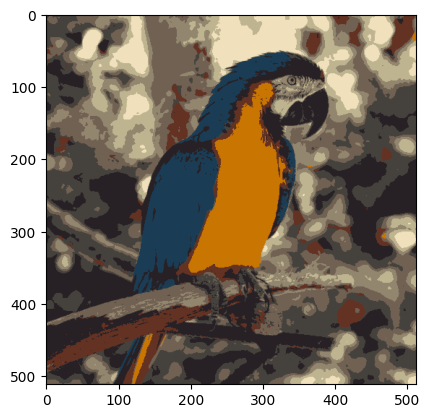

In [71]:
model = KMeans(9)      #Anzahl der Farben bestimmen
model.fit(data)
data_reduced = model.cluster_centers_[model.predict(data)]
img16 = np.reshape(data_reduced, (512, 512, 3))
plt.imshow(img16)
plt.show()

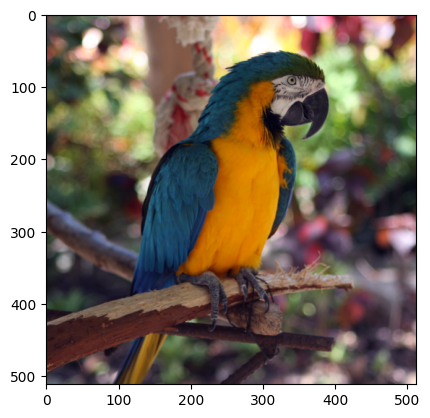

In [72]:
#Versuch 3

img = plt.imread('data/papa.png')
plt.imshow(img)
plt.show()

In [89]:
data2 = np.reshape(img, (512*512, 3))

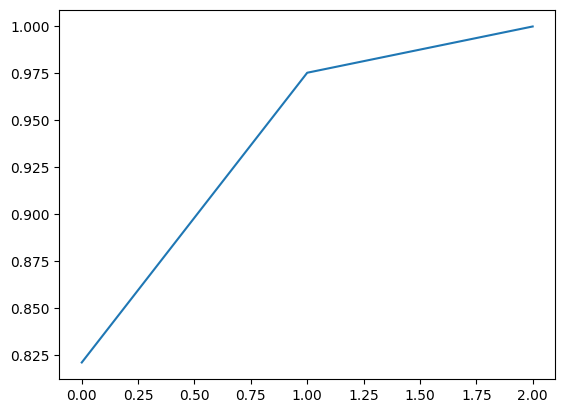

In [92]:
model = PCA()
model.fit(data2)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.show()

In [96]:
model.fit(data2)
model = PCA(0.8)

img_rec = model.inverse_transform(model.fit_transform(img))
img_rec

ValueError: Found array with dim 3. PCA expected <= 2.

In [ ]:
de_noise = model.inverse_transform(model.fit_transform(noise))